In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# delimeter=';' or sep=';'
df = pd.read_csv('bank_data.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
df = pd.read_csv('term_deposit.csv')
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,53,technician,married,unknown,no,no,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,28,management,single,university.degree,no,yes,no,cellular,jun,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,39,services,married,high.school,no,no,no,cellular,apr,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,55,retired,married,basic.4y,no,yes,no,cellular,aug,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [19]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [20]:
df.shape

(41188, 21)

In [21]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [22]:
df.duplicated().sum()

12

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [24]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [25]:
df.dtypes.value_counts()

object     10
int64       6
float64     5
dtype: int64

In [31]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
num_cols = [i for i in df.columns if df[i].dtypes!='object']
print(cat_cols)
print(num_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


#### Categorical Columns

In [35]:
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

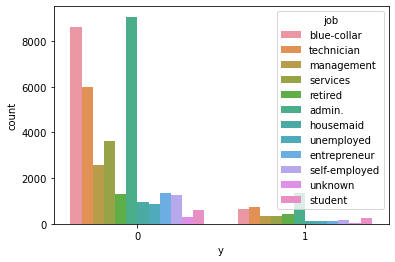

In [34]:
sns.countplot(x=df['y'], hue=df['job'])
plt.show()

In [36]:
df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

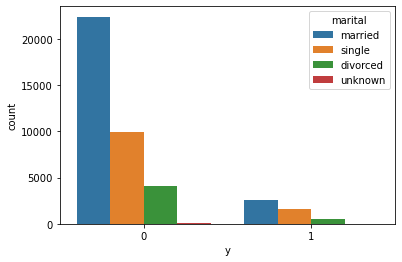

In [37]:
sns.countplot(x=df['y'], hue=df['marital'])
plt.show()

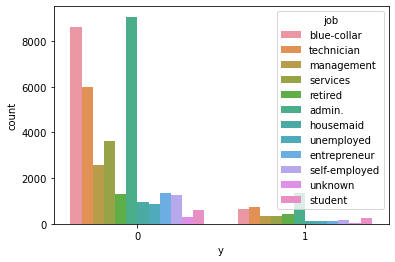

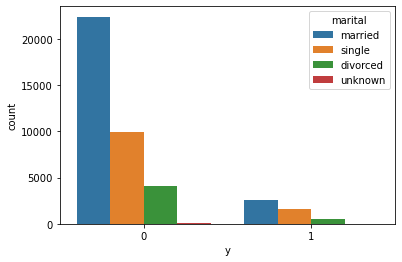

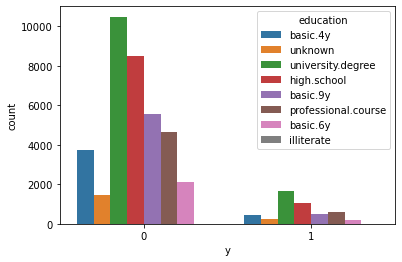

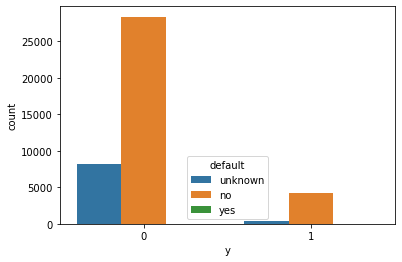

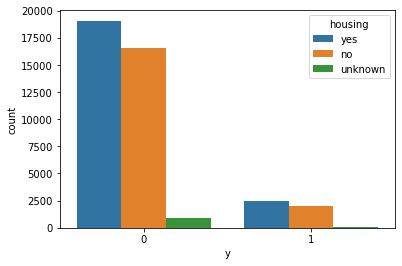

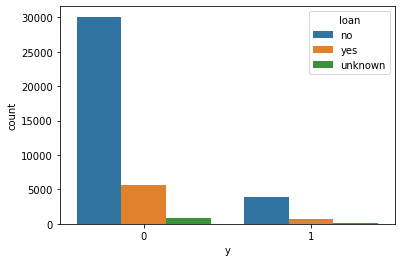

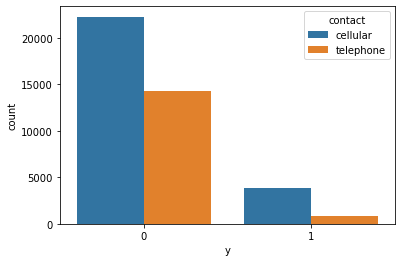

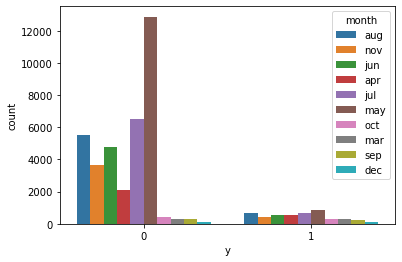

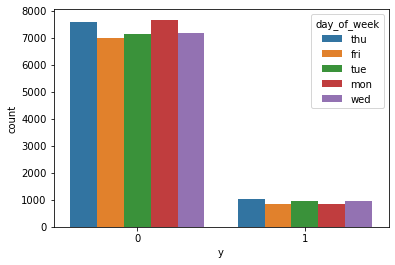

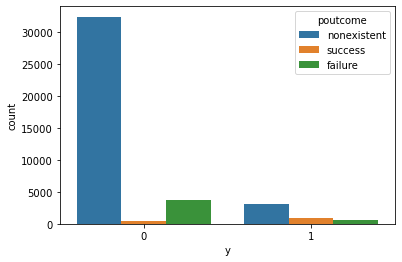

In [38]:
for i in cat_cols:
    sns.countplot(x =df['y'],hue=df[i])
    plt.show()

In [39]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [40]:
df['education'] = df['education'].replace(['basic.9y','basic.6y','basic.4y'],
                                          'basic')
# OR
# df['education'].replace(['basic.9y','basic.6y','basic.4y'],
# 'basic',inplace=True)

df['education'].value_counts()

basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [45]:
print(num_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


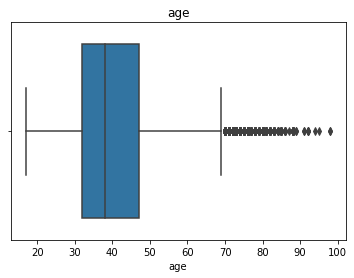

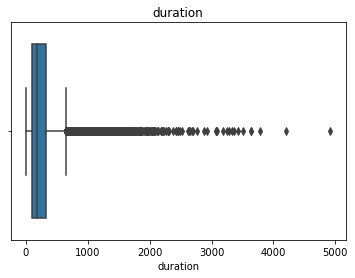

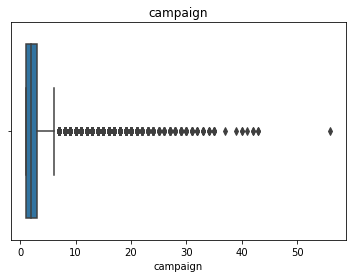

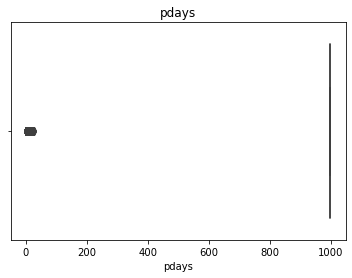

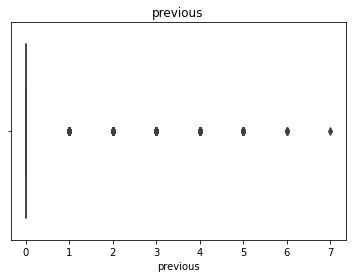

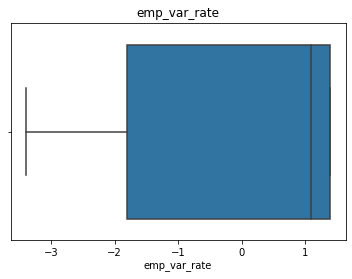

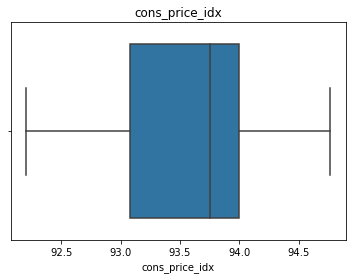

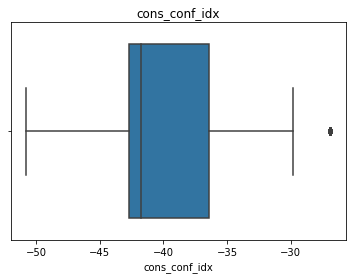

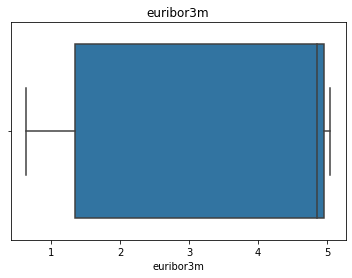

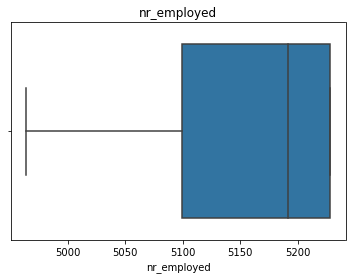

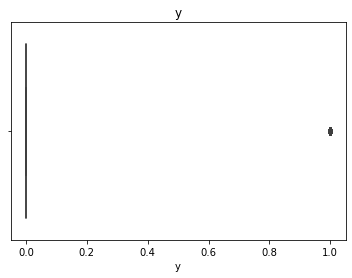

In [43]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [48]:
df[df['pdays']<3.0].shape

(102, 21)

In [46]:
df.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
age,41176.0,40.023800,10.420680,17.000,23.000,24.000,25.000,38.000,59.000,62.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,11.000,17.000,23.000,180.000,911.000,1052.500,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,1.000,1.000,2.000,9.000,11.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,0.000,1.000,2.000,2.000,7.000
emp_var_rate,41176.0,0.081922,1.570883,-3.400,-3.400,-3.400,-3.000,1.100,1.400,1.400,1.400,1.400
cons_price_idx,41176.0,93.575720,0.578839,92.201,92.201,92.379,92.431,93.749,94.465,94.465,94.465,94.767
cons_conf_idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-47.100,-47.100,-41.800,-31.400,-30.100,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,0.714,0.720,4.857,4.967,4.968,4.968,5.045
nr_employed,41176.0,5167.034870,72.251364,4963.600,4963.600,4991.600,4991.600,5191.000,5228.100,5228.100,5228.100,5228.100


In [ ]:
# age,       duraion, campaign,previous, nr_employed
# min,max                                 min

In [50]:
def outlier_handle(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [52]:
outlier_cols = ['age','duration','campaign','previous','nr_employed']
df[outlier_cols] = df[outlier_cols].apply(outlier_handle)

### Correlation

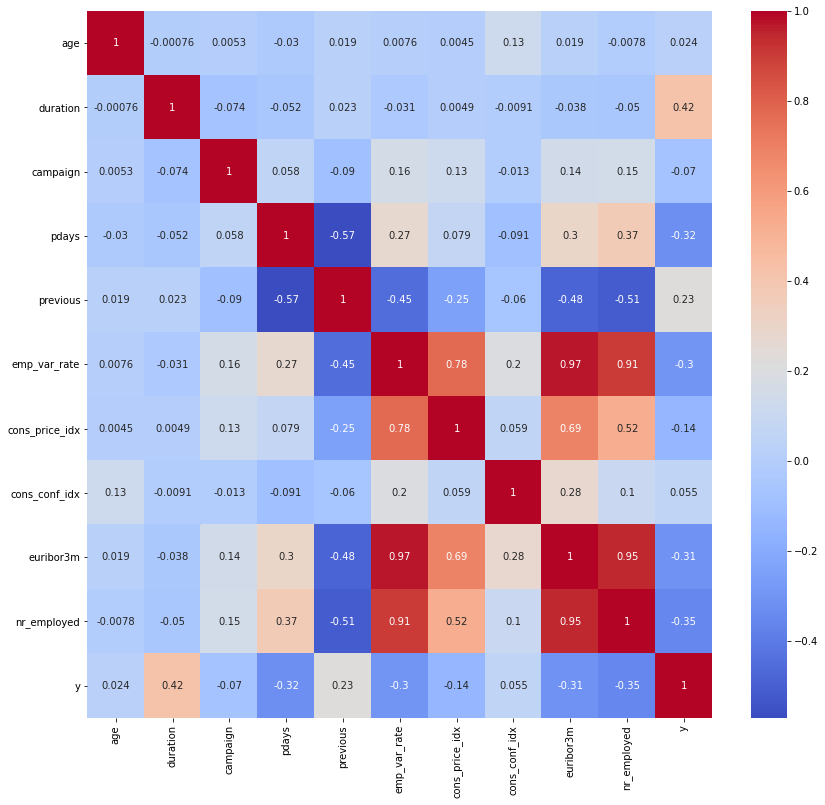

In [54]:
corr = df.corr()
plt.figure(figsize=(14,13))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [55]:
#### Exclude - nr_employed, euribor3m

In [56]:
df1 = df.copy()
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [59]:
df.dtypes.value_counts()

int32      10
float64     6
int64       5
dtype: int64

In [60]:
x = df.drop('y',axis=1)
y = df['y']
print(x.shape)
print(y.shape)

(41176, 20)
(41176,)


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=32)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 20)
(10294, 20)
(30882,)
(10294,)


In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [66]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Prediction\n',y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))


In [68]:
m1 = RandomForestClassifier(n_estimators=120,criterion='gini',
                            max_depth=12,min_samples_split=15)
gen_metrics(m1,x_train,x_test,y_train,y_test)

Prediction
 [0 0 0 ... 0 0 0]
Training score 0.9460203354705006
Testing score 0.9171361958422382
Accuracy_Score 0.9171361958422382
Confusion Matrix
 [[8897  247]
 [ 606  544]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      9144
           1       0.69      0.47      0.56      1150

    accuracy                           0.92     10294
   macro avg       0.81      0.72      0.76     10294
weighted avg       0.91      0.92      0.91     10294



In [70]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                        'Norm_Imp':m1.feature_importances_*100})
fimp_m1.sort_values('Norm_Imp',ascending=False)

,Features,Norm_Imp
10,duration,39.363157
19,nr_employed,12.124800
18,euribor3m,11.190053
12,pdays,4.807216
14,poutcome,4.146811
0,age,4.128676
17,cons_conf_idx,3.411957
15,emp_var_rate,3.225074
16,cons_price_idx,3.004995
8,month,2.237745


### SVC

In [71]:
import time

In [74]:
y_test.head()

28492    0
17018    0
13208    1
7553     0
20948    0
Name: y, dtype: int64

In [75]:
st = time.time()
m2 = SVC(kernel='linear',C=1)
gen_metrics(m2,x_train,x_test,y_train,y_test)
et = time.time()
print(f'Time elapsed is {et-st} sec')

Prediction
 [0 0 0 ... 0 0 0]
Training score 0.8987436046888155
Testing score 0.9024674567709345
Accuracy_Score 0.9024674567709345
Confusion Matrix
 [[8690  454]
 [ 550  600]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      9144
           1       0.57      0.52      0.54      1150

    accuracy                           0.90     10294
   macro avg       0.75      0.74      0.74     10294
weighted avg       0.90      0.90      0.90     10294



TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

In [77]:
m2.predict_proba(x_test)

AttributeError: predict_proba is not available when  probability=False

In [78]:
st = time.time()
m3 = SVC(kernel='linear',C=1,probability=True)
gen_metrics(m3,x_train,x_test,y_train,y_test)
et = time.time()
print(f'Time elapsed is {et-st} sec')

Prediction
 [0 0 0 ... 0 0 0]
Training score 0.8987436046888155
Testing score 0.9024674567709345
Accuracy_Score 0.9024674567709345
Confusion Matrix
 [[8690  454]
 [ 550  600]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      9144
           1       0.57      0.52      0.54      1150

    accuracy                           0.90     10294
   macro avg       0.75      0.74      0.74     10294
weighted avg       0.90      0.90      0.90     10294

Time elapsed is 631.694983959198 sec


In [82]:
m3.predict_proba(x_test)

array([[0.99382461, 0.00617539],
       [0.98686278, 0.01313722],
       [0.59247354, 0.40752646],
       ...,
       [0.46636529, 0.53363471],
       [0.9928309 , 0.0071691 ],
       [0.97402285, 0.02597715]])

In [86]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [85]:
hparams_svc = {'kernel':['linear','poly'],
               'C':[0.01,0.1,1,10],
               'degree':[1,2,3]}
print(hparams_svc)

{'kernel': ['linear', 'poly'], 'C': [0.01, 0.1, 1, 10], 'degree': [1, 2, 3]}


In [87]:
st = time.time()
model = SVC()
rs = RandomizedSearchCV(model,param_distributions=hparams_svc,
                        scoring='accuracy')
gen_metrics(rs,x_train,x_test,y_train,y_test)
et = time.time()
print(f'Time elapsed is {et-st} sec')

Prediction
 [0 0 0 ... 0 0 0]
Training score 0.9054141571141765
Testing score 0.9061589275306003
Accuracy_Score 0.9061589275306003
Confusion Matrix
 [[8787  357]
 [ 609  541]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9144
           1       0.60      0.47      0.53      1150

    accuracy                           0.91     10294
   macro avg       0.77      0.72      0.74     10294
weighted avg       0.90      0.91      0.90     10294

Time elapsed is 4244.459909200668 sec


#### Get_Dummies

In [79]:
df2 = pd.get_dummies(df1,columns=cat_cols)
df2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210.0,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138.0,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339.0,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185.0,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137.0,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [80]:
df2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

In [81]:
x1 = df2.drop('y',axis=1)
y1 = df2['y']
print(x1.shape)
print(y1.shape)

(41176, 61)
(41176,)


In [83]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.25,
                                                 random_state=18)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(30882, 61)
(10294, 61)
(30882,)
(10294,)


#### SVC Poly

In [ ]:
st = time.time()
m5 = SVC(kernel='poly',degree=3)
gen_metrics(m5,x_train1,x_test1,y_train1,y_test1)
et = time.time()
print(f'Time elapsed is {et-st} sec')